# 第6章 決定木系回帰予測を行う10本ノック

## ノック51:決定木モデルを構築しよう


In [49]:
import pandas as pd
from sklearn.datasets import load_boston
boston=load_boston()

df=pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV']=boston.target 
display(df.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [50]:
#説明変数X,目的変数yに分割
X=df[boston.feature_names]
y=df[['MEDV']]

display(X.head())
display(y.head())

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [51]:
#訓練データとテストデータへ分割
from random import random
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

print(len(X_train))
display(X_train.head())
print(len(X_test))
display(X_test.head())

354


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
141,1.62864,0.0,21.89,0.0,0.624,5.019,100.0,1.4394,4.0,437.0,21.2,396.90,34.41
272,0.11460,20.0,6.96,0.0,0.464,6.538,58.7,3.9175,3.0,223.0,18.6,394.96,7.73
135,0.55778,0.0,21.89,0.0,0.624,6.335,98.2,2.1107,4.0,437.0,21.2,394.67,16.96
298,0.06466,70.0,2.24,0.0,0.400,6.345,20.1,7.8278,5.0,358.0,14.8,368.24,4.97
122,0.09299,0.0,25.65,0.0,0.581,5.961,92.9,2.0869,2.0,188.0,19.1,378.09,17.93


152


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
329,0.06724,0.0,3.24,0.0,0.460,6.333,17.2,5.2146,4.0,430.0,16.9,375.21,7.34
371,9.23230,0.0,18.10,0.0,0.631,6.216,100.0,1.1691,24.0,666.0,20.2,366.15,9.53
219,0.11425,0.0,13.89,1.0,0.550,6.373,92.4,3.3633,5.0,276.0,16.4,393.74,10.50
403,24.80170,0.0,18.10,0.0,0.693,5.349,96.0,1.7028,24.0,666.0,20.2,396.90,19.77
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34


In [52]:
#モデルの構築
from sklearn.tree import DecisionTreeRegressor
#max_depth決定技の深さ
tree_reg=DecisionTreeRegressor(max_depth=3,random_state=0).fit(X_train,y_train)

[Text(558.0, 380.52, 'X[5] <= 6.797\nmse = 84.765\nsamples = 354\nvalue = 22.745'),
 Text(279.0, 271.8, 'X[12] <= 14.405\nmse = 35.011\nsamples = 284\nvalue = 19.614'),
 Text(139.5, 163.07999999999998, 'X[7] <= 1.474\nmse = 20.776\nsamples = 167\nvalue = 22.981'),
 Text(69.75, 54.360000000000014, 'mse = 0.0\nsamples = 2\nvalue = 50.0'),
 Text(209.25, 54.360000000000014, 'mse = 12.072\nsamples = 165\nvalue = 22.653'),
 Text(418.5, 163.07999999999998, 'X[0] <= 5.782\nmse = 16.049\nsamples = 117\nvalue = 14.808'),
 Text(348.75, 54.360000000000014, 'mse = 10.345\nsamples = 67\nvalue = 16.872'),
 Text(488.25, 54.360000000000014, 'mse = 10.334\nsamples = 50\nvalue = 12.042'),
 Text(837.0, 271.8, 'X[5] <= 7.435\nmse = 85.388\nsamples = 70\nvalue = 35.451'),
 Text(697.5, 163.07999999999998, 'X[0] <= 7.393\nmse = 44.147\nsamples = 47\nvalue = 30.921'),
 Text(627.75, 54.360000000000014, 'mse = 19.597\nsamples = 43\nvalue = 32.465'),
 Text(767.25, 54.360000000000014, 'mse = 6.997\nsamples = 4\nva

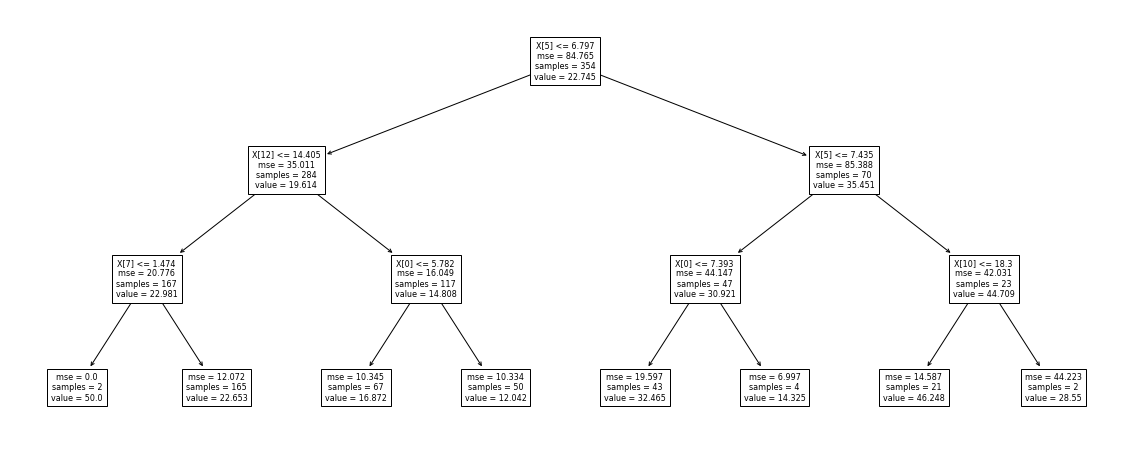

In [53]:
#モデルの確認
from sklearn import tree
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(20,8))
tree.plot_tree(tree_reg,fontsize=8)

## ノック52:決定木モデルを評価しよう

In [54]:
y_train_pred=tree_reg.predict(X_train)
y_test_pred=tree_reg.predict(X_test)

import numpy as np

y_train_pred=np.expand_dims(y_train_pred,1)
y_test_pred=np.expand_dims(y_test_pred,1)

print(len(y_train_pred))
print(y_train_pred[:5])
print(len(y_test_pred))
print(y_test_pred[:5])

354
[[16.87164179]
 [22.65333333]
 [16.87164179]
 [22.65333333]
 [16.87164179]]
152
[[22.65333333]
 [50.        ]
 [22.65333333]
 [12.042     ]
 [22.65333333]]


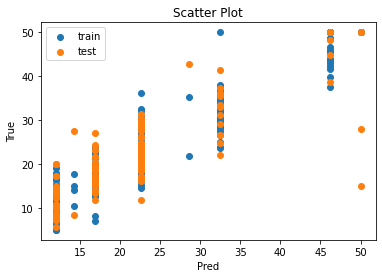

In [55]:
plt.scatter(y_train_pred, y_train, label="train")
plt.scatter(y_test_pred, y_test, label="test")
plt.xlabel("Pred")
plt.ylabel("True")
plt.title("Scatter Plot")
plt.legend()
plt.show()


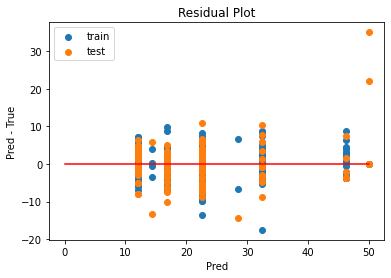

In [56]:
#残差プロット
def residual_plot(y_train_pred, y_train, y_test_pred, y_test):
  plt.scatter(y_train_pred, y_train_pred - y_train, label="train")
  plt.scatter(y_test_pred, y_test_pred - y_test, label="test")
  plt.plot([0, 50], [0,0] ,color="red")
  plt.xlabel("Pred")
  plt.ylabel("Pred - True")
  plt.title("Residual Plot")
  plt.legend()
  plt.show()

residual_plot(y_train_pred, y_train, y_test_pred, y_test)

In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def get_eval_score(y_true,y_pred):

      mae = mean_absolute_error(y_true,y_pred)
      mse = mean_squared_error(y_true,y_pred)
      rmse = np.sqrt(mse)
      r2score = r2_score(y_true,y_pred)

      print(f"  MAE = {mae}")
      print(f"  MSE = {mse}")
      print(f"  RMSE = {rmse}")
      print(f"  R2 = {r2score}")

print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 2.7210334899446496
  MSE = 12.619014523843608
  RMSE = 3.552325227768934
  R2 = 0.8511285677547421
テストデータスコア
  MAE = 3.452910829225093
  MSE = 28.069857549754044
  RMSE = 5.298099428073622
  R2 = 0.6628873063238391


## ノック53:決定木の深さを変えてみよう

In [58]:
tree_reg_depth_5=DecisionTreeRegressor(max_depth=5,random_state=0).fit(X_train,y_train)

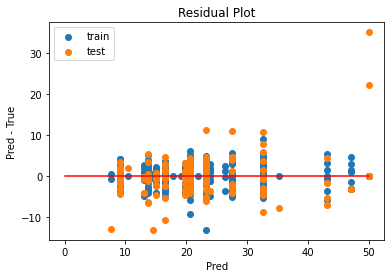

In [59]:
y_train_pred = tree_reg_depth_5.predict(X_train)
y_test_pred=tree_reg_depth_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)


In [60]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 1.8784580945273341
  MSE = 6.077440143979722
  RMSE = 2.4652464671873524
  R2 = 0.9283020701093933
テストデータスコア
  MAE = 3.0192356439784844
  MSE = 24.917914785653885
  RMSE = 4.991784729498447
  R2 = 0.700741432004224


In [61]:
tree_reg_depth_20=DecisionTreeRegressor(max_depth=20,random_state=0).fit(X_train,y_train)

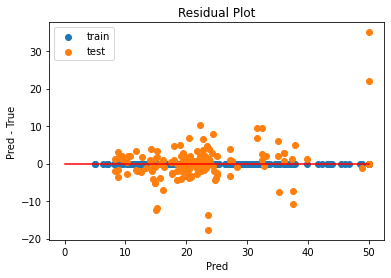

In [62]:
y_train_pred = tree_reg_depth_20.predict(X_train)
y_test_pred=tree_reg_depth_20.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)


In [63]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.0
  MSE = 0.0
  RMSE = 0.0
  R2 = 1.0
テストデータスコア
  MAE = 3.032236842105263
  MSE = 26.352039473684208
  RMSE = 5.13342375746287
  R2 = 0.6835179161458892


## ノック54:最小サンプル数を変えてみよう

In [64]:
tree_reg_samples_5=DecisionTreeRegressor(max_depth=20,min_samples_leaf=5,random_state=0).fit(X_train,y_train)

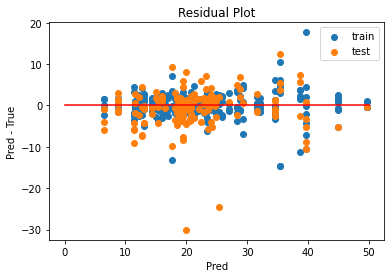

In [65]:
y_train_pred = tree_reg_samples_5.predict(X_train)
y_test_pred = tree_reg_samples_5.predict(X_test)

y_train_pred = np.expand_dims(y_train_pred, 1)
y_test_pred = np.expand_dims(y_test_pred, 1)

residual_plot(y_train_pred, y_train, y_test_pred, y_test)


In [66]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)
#leafを調整することで過学習が抑えられ精度も向上する

訓練データスコア
  MAE = 1.5989429199174965
  MSE = 7.050472435207605
  RMSE = 2.655272572676411
  R2 = 0.9168228289576953
テストデータスコア
  MAE = 3.104546261487051
  MSE = 23.502406639428433
  RMSE = 4.847928076965296
  R2 = 0.7177413673707927


## ノック55:ランダムフォレストモデルの構築・評価をしよう

In [67]:
#ランダムフォレスト＝アンサンブル学習＝バギング
from sklearn.ensemble import RandomForestRegressor

#n_estimatorsで決定技の数を指定
rf=RandomForestRegressor(n_estimators=10, max_depth=20, random_state=0).fit(X_train,y_train)

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


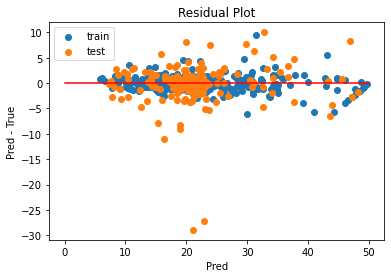

In [68]:
y_train_pred=rf.predict(X_train)
y_test_pred=rf.predict(X_test)

y_train_pred=np.expand_dims(y_train_pred,1)
y_test_pred=np.expand_dims(y_test_pred,1)

residual_plot(y_train_pred,y_train,y_test_pred,y_test)

In [69]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 0.9476271186440679
  MSE = 2.069253672316385
  RMSE = 1.4384900668118585
  R2 = 0.9755882079940209
テストデータスコア
  MAE = 2.60125
  MSE = 19.92925592105263
  RMSE = 4.46421951981
  R2 = 0.7606541061136771


## ノック56:ランダムフォレストの決定木の数を変えてみよう

In [70]:
rf_change_param=RandomForestRegressor(n_estimators=3,max_depth=20,random_state=0).fit(X_train,y_train)

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


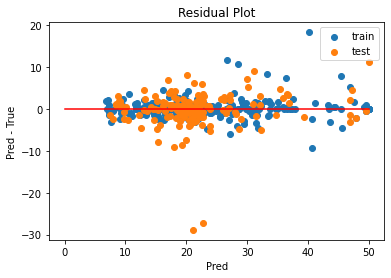

In [71]:
y_train_pred=rf_change_param.predict(X_train)
y_test_pred=rf_change_param.predict(X_test)

y_train_pred=np.expand_dims(y_train_pred,1)
y_test_pred=np.expand_dims(y_test_pred,1)

residual_plot(y_train_pred,y_train,y_test_pred,y_test)

In [72]:
print("訓練データスコア")
get_eval_score(y_train,y_train_pred)
print("テストデータスコア")
get_eval_score(y_test,y_test_pred)

訓練データスコア
  MAE = 1.0513182674199624
  MSE = 4.228691148775894
  RMSE = 2.0563781628815003
  R2 = 0.9501124825039535
テストデータスコア
  MAE = 2.633991228070175
  MSE = 19.94547514619883
  RMSE = 4.466035730510766
  R2 = 0.7604593168573125


## ノック57:交差検証法でモデルを評価しよう

![](2022-09-24-06-19-21.png)

In [73]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#estimator:交差検証で使用するモデル X:説明変数 y:目的変数 cv:交差検証でのデータの分割方法 scoring:評価方法
rf_cv=RandomForestRegressor(n_estimators=3,max_depth=5,random_state=0)
k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
rf_scores=cross_val_score(estimator=rf_cv,X=X,y=y,cv=k_fold,scoring='r2')

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/s

In [74]:
print(f'各分割のスコア:{rf_scores}')
print(f'平均スコア:{np.mean(rf_scores)}')

各分割のスコア:[0.74574193 0.85140316 0.73379121 0.66373528 0.86016952]
平均スコア:0.7709682208769734


## ノック58:勾配ブースティング決定木モデルを構築・評価しよう

In [75]:
import xgboost as xgb 

xgb_reg=xgb.XGBRegressor(random_state=0,silent=True)
k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
xgb_scores=cross_val_score(xgb_reg,X,y,cv=k_fold,scoring='r2')

[06:53:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:53:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgboost/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[06:53:45] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-3.7/xgbo

In [76]:
print(f'各分割のスコア:{xgb_scores}')
print(f'平均スコア:{np.mean(xgb_scores)}')


各分割のスコア:[0.73759833 0.92436108 0.80214865 0.7533159  0.91352172]
平均スコア:0.8261891364472967


## ノック59:グリッドサーチでハイパーパラメータをチューニングしよう

![](2022-09-24-06-33-24.png)

In [77]:
#GridSearchCVはハイパーパラメーターのそれぞれの組み合わせを交差検証で評価し、最も評価が高かった組み合わせでモデルを再学習してくれる
xgb_reg_grid=xgb.XGBRegressor()

from sklearn.model_selection import GridSearchCV

params = {"booster": ["gbtree"],
          "n_estimators": [10, 30, 50, 100],
          "max_depth": [2, 3, 4, 5, 6],
          "learning_rate": [0.1, 0.25, 0.5, 0.75, 1.0],
          "colsample_bytree": [0.1, 0.25, 0, 5, 0.75, 1.0],
          "random_state": [0]
          }

k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
grid=GridSearchCV(estimator=xgb_reg_grid,param_grid=params,cv=k_fold,scoring='r2')

![](2022-09-24-06-40-14.png)

In [78]:
grid.fit(X_train,y_train)

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/sklearn.py", line 972, in fit
    callbacks=callbacks,
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/training.py", line 181, in tr

GridSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=...
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None, ...),
             param_grid={'boo

In [79]:
print(grid.best_params_)
print(grid.best_score_)

{'booster': 'gbtree', 'colsample_bytree': 0.75, 'learning_rate': 0.25, 'max_depth': 3, 'n_estimators': 100, 'random_state': 0}
0.89540377678077


In [80]:
y_test_pred = grid.predict(X_test)
y_test_pred=np.expand_dims(y_test_pred,1)

print('テストデータスコア')
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 2.65083612203598
  MSE = 18.80060983337624
  RMSE = 4.335967000955639
  R2 = 0.7742088924943791


## ノック60:ランダムサーチでパラメータを調整しよう

In [81]:
xgb_reg_random=xgb.XGBRegressor()

from sklearn.model_selection import RandomizedSearchCV

params = {"booster": ["gbtree"],
          "n_estimators": [10, 30, 50, 100],
          "max_depth": [2, 3, 4, 5, 6],
          "learning_rate": [0.1, 0.25, 0.5, 0.75, 1.0],
          "colsample_bytree": [0.1, 0.25, 0, 5, 0.75, 1.0],
          "random_state": [0]
          }

k_fold=KFold(n_splits=5,shuffle=True,random_state=0)
#n_iterはランダムサーチの検証回数
random=RandomizedSearchCV(estimator=xgb_reg_random,param_distributions=params,cv=k_fold,scoring='r2',n_iter=30,random_state=0)

In [82]:
random.fit(X_train,y_train)

/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/sklearn.py", line 972, in fit
    callbacks=callbacks,
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/core.py", line 532, in inner_f
    return f(**kwargs)
  File "/Users/takashie/opt/anaconda3/envs/m1tf/lib/python3.7/site-packages/xgboost/training.py", line 181, in tr

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constr...
                                          n_estimators=100, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=

In [83]:
print(random.best_params_)
print(random.best_score_)

{'random_state': 0, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.25, 'colsample_bytree': 0.75, 'booster': 'gbtree'}
0.8930557210791392


In [84]:
y_test_pred=random.predict(X_test)
y_test_pred=np.expand_dims(y_test_pred,1)

print('テストデータスコア')
get_eval_score(y_test,y_test_pred)

テストデータスコア
  MAE = 2.6735913784880387
  MSE = 20.25981416180351
  RMSE = 4.5010903303314755
  R2 = 0.7566841757797286


![](2022-09-24-06-54-28.png)

![](2022-09-24-06-54-51.png)